In [24]:
import pandas as pd

dow_jones = pd.read_csv('^DJI.csv')
dow_jones = dow_jones.drop(["High","Low","Adj Close","Volume"],axis = 1)
dow_jones

,Date,Open,Close
0,1985-01-29,1277.719971,1292.619995
1,1985-01-30,1297.369995,1287.880005
2,1985-01-31,1283.239990,1286.770020
3,1985-02-01,1276.939941,1277.719971
4,1985-02-04,1272.079956,1290.079956
5,1985-02-05,1294.060059,1285.229980
6,1985-02-06,1284.890015,1280.589966
7,1985-02-07,1285.000000,1290.079956
8,1985-02-08,1290.079956,1289.969971
9,1985-02-11,1287.989990,1276.060059


In [25]:
snp_500 = pd.read_csv('^GSPC.csv')
snp_500 = snp_500.drop(["High","Low","Adj Close","Volume"],axis = 1)
snp_500

,Date,Open,Close
0,1927-12-30,17.660000,17.660000
1,1928-01-03,17.760000,17.760000
2,1928-01-04,17.719999,17.719999
3,1928-01-05,17.549999,17.549999
4,1928-01-06,17.660000,17.660000
5,1928-01-09,17.500000,17.500000
6,1928-01-10,17.370001,17.370001
7,1928-01-11,17.350000,17.350000
8,1928-01-12,17.469999,17.469999
9,1928-01-13,17.580000,17.580000


In [26]:
small_business = pd.read_csv('SSBCI Transactions Dataset (1).csv')
disburse = small_business["disbursement_date"]
loans = small_business["loan_investment_amount"]

In [27]:
quarter_gdp = pd.read_csv('quarter_csv.csv')
quarter_gdp = quarter_gdp.drop(["level-chained","change-current","change-chained"],axis = 1)
quarter_gdp

,date,level-current
0,1947-04-01,246.3
1,1947-07-01,250.1
2,1947-10-01,260.3
3,1948-01-01,266.2
4,1948-04-01,272.9
5,1948-07-01,279.5
6,1948-10-01,280.7
7,1949-01-01,275.4
8,1949-04-01,271.7
9,1949-07-01,273.3


In [28]:
year_gdp = pd.read_csv('year_csv.csv')
year_gdp = year_gdp.drop(["level-chained","change-current","change-chained"],axis = 1)
year_gdp

,date,level-current
0,1930,92.2
1,1931,77.4
2,1932,59.5
3,1933,57.2
4,1934,66.8
5,1935,74.3
6,1936,84.9
7,1937,93.0
8,1938,87.4
9,1939,93.5


In [29]:
import numpy as np
yield_curve = pd.read_csv('yeild_curve_data - Sheet1 (1).csv')
yields = []
for row_ind,row in yield_curve.iterrows():
    items = []
    for item in row:
        if pd.isnull(item) == False:
            items.append(item)
        else:
            items.append(0)
    yields.append(items)
yields = np.array(yields)
yields.transpose()
yields

array([['01/03/00', '0', '0', ..., '6.58', '6.94', '6.61'],
       ['01/04/00', '0', '0', ..., '6.49', '6.84', '6.53'],
       ['01/05/00', '0', '0', ..., '6.62', '6.95', '6.64'],
       ...,
       ['04/08/20', '0.14', '0.17', ..., '0.77', '1.18', '1.37'],
       ['04/09/20', '0.2', '0.27', ..., '0.73', '1.15', '1.35'],
       ['04/13/20', '0.17', '0.29', ..., '0.76', '1.19', '1.39']],
      dtype='<U8')

In [37]:
yield_curve_1 = pd.read_csv('yeild_curve_data - Sheet1 (1).csv')
yield_curve_2 = yield_curve_2.dropna()
yield_curve_2

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
4702,10/16/18,2.19,2.22,2.30,2.46,2.66,2.87,2.95,3.02,3.10,3.16,3.26,3.32
4703,10/17/18,2.20,2.23,2.31,2.47,2.66,2.89,2.97,3.04,3.13,3.19,3.29,3.35
4704,10/18/18,2.19,2.23,2.32,2.47,2.67,2.87,2.95,3.03,3.11,3.17,3.28,3.36
4705,10/19/18,2.19,2.23,2.31,2.48,2.67,2.92,2.99,3.05,3.14,3.20,3.31,3.38
4706,10/22/18,2.18,2.25,2.34,2.49,2.68,2.92,2.99,3.05,3.13,3.20,3.31,3.38
4707,10/23/18,2.21,2.23,2.33,2.48,2.67,2.89,2.95,3.01,3.10,3.17,3.29,3.37
4708,10/24/18,2.20,2.23,2.34,2.47,2.64,2.84,2.89,2.94,3.02,3.10,3.24,3.33
4709,10/25/18,2.19,2.24,2.34,2.47,2.66,2.86,2.92,2.98,3.07,3.14,3.27,3.35
4710,10/26/18,2.16,2.21,2.33,2.47,2.63,2.81,2.85,2.91,3.00,3.08,3.23,3.32
4711,10/29/18,2.17,2.21,2.34,2.49,2.64,2.81,2.86,2.91,3.00,3.08,3.23,3.33


In [62]:
yield_curve_1 = pd.read_csv('yeild_curve_data - Sheet1 (1).csv', usecols = [0,1,3,4,5,6,7,8,9,10,11,12])

In [69]:
YC_2000 = yield_curve_1[:251]
YC_2001 = yield_curve_1[252:499]
YC_2002 = yield_curve_1[499:749]
YC_2003 = yield_curve_1[749:999]
YC_2004 = yield_curve_1[999:1249]
YC_2005 = yield_curve_1[1249:1499]
YC_2006 = yield_curve_1[1499:1749]
YC_2007 = yield_curve_1[1749:2000]
YC_2008 = yield_curve_1[2000:2251]
YC_2009 = yield_curve_1[2251:2501]
YC_2010 = yield_curve_1[2501:2753]
YC_2011 = yield_curve_1[2753:3003]
YC_2012 = yield_curve_1[3003:3253]
YC_2013 = yield_curve_1[3253:3503]
YC_2014 = yield_curve_1[3503:3753]
YC_2015 = yield_curve_1[3753:4004]
YC_2016 = yield_curve_1[4004:4254]
YC_2017 = yield_curve_1[4254:4504]
YC_2018 = yield_curve_1[4504:4753]
YC_2019 = yield_curve_1[4753:5003]
YC_2020 = yield_curve_1[5003:]

In [81]:
YC_1Mo_avg_2001 = YC_2001['1 Mo'].mean()
YC_1Mo_avg_2002 = YC_2002['1 Mo'].mean()
YC_1Mo_avg_2003 = YC_2003['1 Mo'].mean()
YC_1Mo_avg_2004 = YC_2004['1 Mo'].mean()
YC_1Mo_avg_2005 = YC_2005['1 Mo'].mean()
YC_1Mo_avg_2006 = YC_2006['1 Mo'].mean()
YC_1Mo_avg_2007 = YC_2007['1 Mo'].mean()
YC_1Mo_avg_2008 = YC_2008['1 Mo'].mean()
YC_1Mo_avg_2009 = YC_2009['1 Mo'].mean()
YC_1Mo_avg_2010 = YC_2010['1 Mo'].mean()
YC_1Mo_avg_2011 = YC_2011['1 Mo'].mean()
YC_1Mo_avg_2012 = YC_2012['1 Mo'].mean()
YC_1Mo_avg_2013 = YC_2013['1 Mo'].mean()
YC_1Mo_avg_2014 = YC_2014['1 Mo'].mean()
YC_1Mo_avg_2015 = YC_2015['1 Mo'].mean()
YC_1Mo_avg_2016 = YC_2016['1 Mo'].mean()
YC_1Mo_avg_2017 = YC_2017['1 Mo'].mean()
YC_1Mo_avg_2018 = YC_2018['1 Mo'].mean()
YC_1Mo_avg_2019 = YC_2019['1 Mo'].mean()
YC_1Mo_avg_2020 = YC_2020['1 Mo'].mean()

YC_1Mo_data = (YC_1Mo_avg_2001,YC_1Mo_avg_2002,YC_1Mo_avg_2003,YC_1Mo_avg_2004,YC_1Mo_avg_2005,
               YC_1Mo_avg_2006,YC_1Mo_avg_2007,YC_1Mo_avg_2008,YC_1Mo_avg_2009,YC_1Mo_avg_2010, 
               YC_1Mo_avg_2011,YC_1Mo_avg_2012,YC_1Mo_avg_2013,YC_1Mo_avg_2014,YC_1Mo_avg_2015, 
               YC_1Mo_avg_2016, YC_1Mo_avg_2017,YC_1Mo_avg_2018,YC_1Mo_avg_2019,YC_1Mo_avg_2020)

In [95]:
YC_30Yr_avg_2001 = YC_2001['20 Yr'].mean()
YC_30Yr_avg_2002 = YC_2002['20 Yr'].mean()
YC_30Yr_avg_2003 = YC_2003['20 Yr'].mean()
YC_30Yr_avg_2004 = YC_2004['20 Yr'].mean()
YC_30Yr_avg_2005 = YC_2005['20 Yr'].mean()
YC_30Yr_avg_2006 = YC_2006['20 Yr'].mean()
YC_30Yr_avg_2007 = YC_2007['20 Yr'].mean()
YC_30Yr_avg_2008 = YC_2008['20 Yr'].mean()
YC_30Yr_avg_2009 = YC_2009['20 Yr'].mean()
YC_30Yr_avg_2010 = YC_2010['20 Yr'].mean()
YC_30Yr_avg_2011 = YC_2011['20 Yr'].mean()
YC_30Yr_avg_2012 = YC_2012['20 Yr'].mean()
YC_30Yr_avg_2013 = YC_2013['20 Yr'].mean()
YC_30Yr_avg_2014 = YC_2014['20 Yr'].mean()
YC_30Yr_avg_2015 = YC_2015['20 Yr'].mean()
YC_30Yr_avg_2016 = YC_2016['20 Yr'].mean()
YC_30Yr_avg_2017 = YC_2017['20 Yr'].mean()
YC_30Yr_avg_2018 = YC_2018['20 Yr'].mean()
YC_30Yr_avg_2019 = YC_2019['20 Yr'].mean()
YC_30Yr_avg_2020 = YC_2020['20 Yr'].mean()

YC_20Yr_data = (YC_30Yr_avg_2001,YC_30Yr_avg_2002,YC_30Yr_avg_2003,YC_30Yr_avg_2004,YC_30Yr_avg_2005,
               YC_30Yr_avg_2006,YC_30Yr_avg_2007,YC_30Yr_avg_2008,YC_30Yr_avg_2009,YC_30Yr_avg_2010, 
               YC_30Yr_avg_2011,YC_30Yr_avg_2012,YC_30Yr_avg_2013,YC_30Yr_avg_2014,YC_30Yr_avg_2015, 
               YC_30Yr_avg_2016,YC_30Yr_avg_2017,YC_30Yr_avg_2018,YC_30Yr_avg_2019,YC_30Yr_avg_2020)

Text(0, 0.5, 'Yield Curve #')

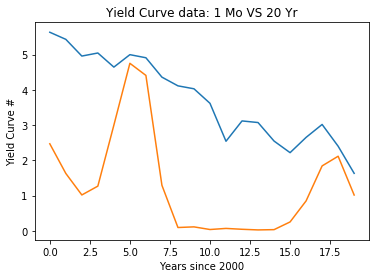

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline 


plt.plot(YC_20Yr_data)
plt.plot(YC_1Mo_data)
plt.title('Yield Curve data: 1 Mo VS 20 Yr')
plt.xlabel('Years since 2000')
plt.ylabel('Yield Curve #')